<a href="https://colab.research.google.com/github/nagendrap418/ds_linear/blob/main/Logistic_Regression_updated_sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
# loading claimants data 
claimants = pd.read_csv("claimants.csv")
claimants 

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
claimants.head(10)
claimants.isnull().sum() 

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
claimants.describe()  

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


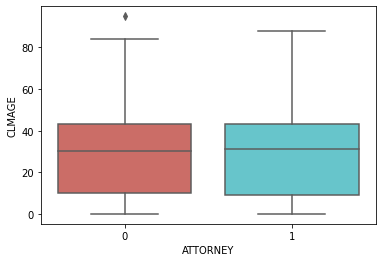

In [6]:

sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")  

In [7]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)
#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]

# Getting the barplot for the categorical columns  

In [8]:
claimants   

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


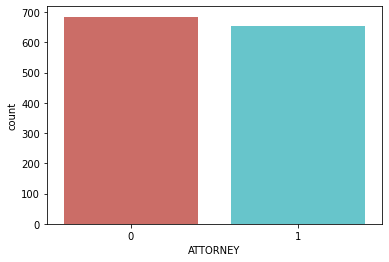

In [9]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls") 
 

In [10]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)  

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


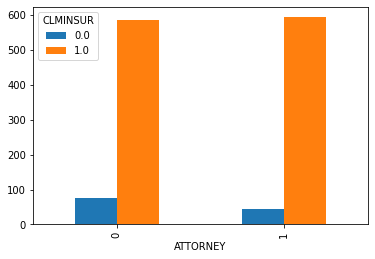

In [11]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind = 'bar')  

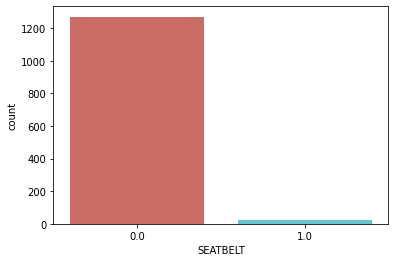

In [12]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
 

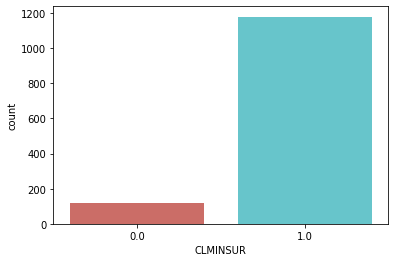

In [13]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls") 

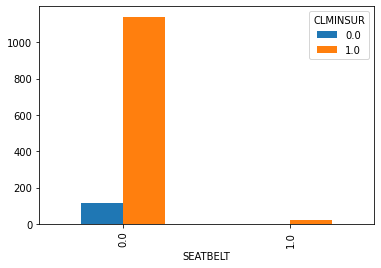

In [14]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")  

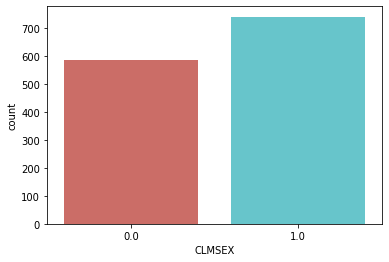

In [15]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")  

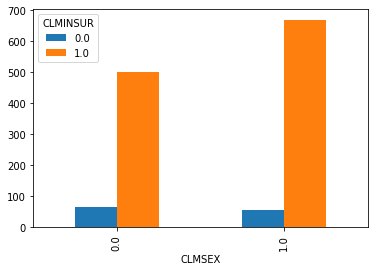

In [16]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar") 

In [17]:
claimants.isnull().sum()
#claimants.shape # 1340 6 => Before dropping null values
# To drop null values ( dropping rows)
#claimants.dropna().shape # 1096 6 => After dropping null values 

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [18]:
# Fill nan values with mode of the categorical column 
claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1
claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1
claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0 

In [19]:
claimants.CLMSEX.mode()
claimants.CLMINSUR.mode()
claimants.SEATBELT.mode()
claimants.CLMAGE.mean() 

28.414422241529106

In [20]:
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4 

In [21]:
claimants.isnull().sum()  

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [22]:
# Model building 
from sklearn.linear_model import LogisticRegression
claimants.shape   

(1340, 6)

In [23]:
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y) 

LogisticRegression()

In [24]:
classifier.coef_  # coefficients of features   

array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [25]:
classifier.predict_proba (X) # Probability values   

array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [26]:
y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred
claimants   

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [27]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)
new_df  

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.495387,0.504613
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.425083,0.574917
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.490007,0.509993
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363271,0.636729
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1,0.406789,0.593211
1336,0,1.0,1.0,0.0,46.0000,3.705,0,0.549435,0.450565
1337,1,1.0,1.0,0.0,39.0000,0.099,1,0.285350,0.714650
1338,0,1.0,0.0,0.0,8.0000,3.177,0,0.686686,0.313314


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 


[[435 250]
 [147 508]]


In [29]:
pd.crosstab(y_pred,Y)  

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [30]:
#type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
accuracy 

0.7037313432835821

In [31]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.7053045077171672

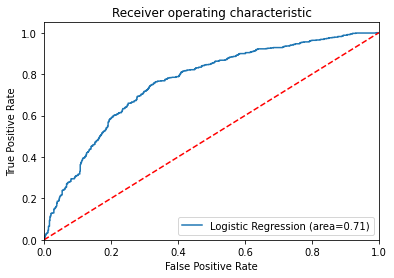

In [33]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [34]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [35]:
y_prob1 

,0
0,0.000026
1,0.504613
2,0.574917
3,0.509993
4,0.636729
...,...
1335,0.593211
1336,0.450565
1337,0.714650
1338,0.313314


Additional code

In [36]:
import statsmodels.api as sm   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
logit = sm.Logit(Y, X)   

In [38]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.609294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.1207
Time:                        10:55:40   Log-Likelihood:                -816.45
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 2.515e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3005      0.116      2.591      0.010       0.073       0.528
CLMINSUR       0.4167      0.124      3.364      0.001       0.174       0.660
SEATBELT      -0.6828      0.522     -1.308      0.191      -1.706       0.341
CLMAGE         0.0059      0.003      1.951      0.051   -2.58e-05       0.012
LOSS          -0.3262      0.029    -11.234      0.000      -0.383      -0.269
==============================================================================
"""

In [39]:
fpr 

array([0.        , 0.        , 0.        , 0.00145985, 0.00145985,
       0.00291971, 0.00291971, 0.00437956, 0.00437956, 0.00583942,
       0.00583942, 0.00729927, 0.00729927, 0.00875912, 0.00875912,
       0.01021898, 0.01021898, 0.01167883, 0.01167883, 0.01313869,
       0.01313869, 0.01459854, 0.01459854, 0.01605839, 0.01605839,
       0.01605839, 0.01605839, 0.01605839, 0.01605839, 0.01751825,
       0.01751825, 0.01751825, 0.01751825, 0.0189781 , 0.0189781 ,
       0.02043796, 0.02043796, 0.02189781, 0.02189781, 0.02481752,
       0.02481752, 0.02919708, 0.02919708, 0.03065693, 0.03065693,
       0.03357664, 0.03357664, 0.03357664, 0.0350365 , 0.0350365 ,
       0.03649635, 0.03649635, 0.0379562 , 0.0379562 , 0.03941606,
       0.03941606, 0.04379562, 0.04379562, 0.04525547, 0.04525547,
       0.04671533, 0.04671533, 0.04817518, 0.04817518, 0.04963504,
       0.04963504, 0.05109489, 0.05109489, 0.0540146 , 0.0540146 ,
       0.0540146 , 0.0540146 , 0.05547445, 0.05547445, 0.05839

In [40]:
tpr  

array([0.        , 0.00152672, 0.00305344, 0.00305344, 0.00763359,
       0.00763359, 0.01984733, 0.01984733, 0.02442748, 0.02442748,
       0.02900763, 0.02900763, 0.03053435, 0.03053435, 0.03206107,
       0.03206107, 0.0351145 , 0.0351145 , 0.04580153, 0.04580153,
       0.06412214, 0.06412214, 0.06564885, 0.06564885, 0.06870229,
       0.07480916, 0.0870229 , 0.09007634, 0.09312977, 0.09312977,
       0.09618321, 0.10076336, 0.10992366, 0.10992366, 0.11603053,
       0.11603053, 0.12671756, 0.12671756, 0.12824427, 0.12824427,
       0.12977099, 0.12977099, 0.14656489, 0.14656489, 0.15114504,
       0.15114504, 0.15267176, 0.15572519, 0.15572519, 0.16030534,
       0.16030534, 0.16183206, 0.16335878, 0.17709924, 0.17709924,
       0.18625954, 0.18625954, 0.19083969, 0.19083969, 0.20152672,
       0.20152672, 0.20763359, 0.20916031, 0.21221374, 0.21221374,
       0.21374046, 0.21374046, 0.21679389, 0.21679389, 0.2259542 ,
       0.23206107, 0.23816794, 0.23816794, 0.23969466, 0.23969